## LAB2: Classificadores baseados em distâncias entre pontos

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Tomás Gomes
## Número: 48614

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab2.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab2-T51D-data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "data":          dados bi-dimensionais (4000 amostras)
### 2. "target":       classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores


<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Classificadores da distância ao centroide:
## 1. Use os dados de treino para estimar os centroides de cada classe. Imprima os valores obtidos para cada classe, indicando a classe em questão.
## 2. Com a métrica de distância euclideana, calcule a matriz de confusão e o número total de erros nos dados de teste.
## 3. Explique brevemente porque é que mais de metade dos pontos da classe "1" não são bem classificados 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix as MC
D=pickle.load(open('Lab2-T51D-data.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


(2, 400)
(2, 3600)
Centróide da Classe 0:  [-0.13243819  0.03660923]
Centróide da Classe 1:  [-0.77640453  1.25665047]
Centróide da Classe 2:  [0.01068383 0.25081224]
Centróide da Classe 3:  [-0.0907223  -0.54198523]


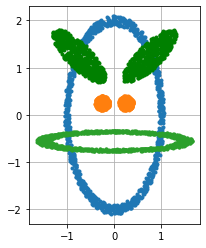

In [3]:
#organizar dados
X = D.data
y = D.target

f1 = D.foldTrain
f2 = D.foldTest

#plot classes
plt.plot(X[0, y==0], X[1, y==0], '.')
plt.plot(X[0, y==1], X[1, y==1], 'g.')
plt.plot(X[0, y==2], X[1, y==2], '.')
plt.plot(X[0, y==3], X[1, y==3], '.')
plt.axis('scaled')
plt.grid()

#dados de treino
X1 = X[:,f1]
y1 = y[f1]

#dados de teste
X2 = X[:,f2]
y2 = y[f2]

#400 folds treino
print(X1.shape)
#3600 folds teste
print(X2.shape)

#centroides
m0 = np.mean(X1[:, y1==0], axis=1)
m1 = np.mean(X1[:, y1==1], axis=1)
m2 = np.mean(X1[:, y1==2], axis=1)
m3 = np.mean(X1[:, y1==3], axis=1)

#prints medias
print("Centróide da Classe 0: ", m0)
print("Centróide da Classe 1: ", m1)
print("Centróide da Classe 2: ", m2)
print("Centróide da Classe 3: ", m3)


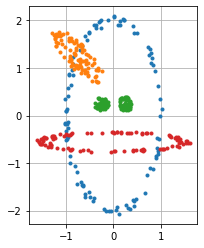

In [14]:
#plot classes
plt.plot(X1[0, y1==0], X1[1, y1==0], '.')
plt.plot(X1[0, y1==1], X1[1, y1==1], '.')
plt.plot(X1[0, y1==2], X1[1, y1==2], '.')
plt.plot(X1[0, y1==3], X1[1, y1==3], '.')
plt.axis('scaled')
plt.grid()

Número total de erros:  1641

Matriz de Confusão: 
 [[ 49 283 151 417]
 [  0 376 524   0]
 [266   0 634   0]
 [  0   0   0 900]]


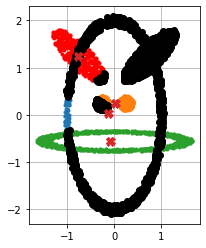

In [5]:
#distancia euclideana dos dados de teste a cada centroide
Xtemp = X2-m0[:, np.newaxis]
D0 = np.sqrt(np.sum(Xtemp**2 , axis=0))
Xtemp = X2-m1[:, np.newaxis]
D1 = np.sqrt(np.sum(Xtemp**2 , axis=0))
Xtemp = X2-m2[:, np.newaxis]
D2 = np.sqrt(np.sum(Xtemp**2 , axis=0))
Xtemp = X2-m3[:, np.newaxis]
D3 = np.sqrt(np.sum(Xtemp**2 , axis=0))

Dtotal = np.vstack((D0,D1,D2,D3))
y2e = np.argmin(Dtotal, axis=0)

#erros
print("Número total de erros: ", np.sum(y2!=y2e))
print()
#matriz de confusao
print("Matriz de Confusão: \n", MC(y2, y2e))

#plot erros
plt.plot(X2[0, y2==0], X2[1, y2==0], '.')
plt.plot(X2[0, y2==1], X2[1, y2==1], 'r.')
plt.plot(X2[0, y2==2], X2[1, y2==2], '.')
plt.plot(X2[0, y2==3], X2[1, y2==3], '.')
plt.plot(X2[0, y2!=y2e], X2[1, y2!=y2e], 'ok')

#medias
M = np.vstack((m0, m1, m2, m3)).T

plt.plot(M[0,:], M[1,:] ,'X', ms=9)

plt.axis('scaled')
plt.grid()
plt.show()

# 3. O centroide dos dados da classe de treino nao é o mesmo que o centroide da classe de teste no caso da classe 1, daí, quando utilizamos o centroide da classe de treino para avaliar a classe de teste, nos dê mais de metade de erros  

## 3. Os pontos da classe 1 não estão bem classificados porque, o centroide da classe 1 está mais distante que os outros centroides aos mesmos

# Pergunta 2 - Classificadores dos k-vizinhos mais próximos:
## (Use os dados de treino nestes classificadores)
## 1. Para k=1, calcule a matriz de confusão e o número total de erros nos dados de teste. 
## 2. Faça um plot dos dados de teste por classe e dos erros cometidos por este classificador.
## 3. Repita as duas alíneas anteriores para k=5

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
#k_neighbors = 1
knn=KNeighborsClassifier(n_neighbors=1).fit(X1.T,y1) #treinar com dados de treino

y2e=knn.predict(X2.T) #usar classificador para calcular os erros nos dados de teste

#matriz de confusao
print("Matriz de Confusão: \n", MC(y2, y2e))
print()
#numero total de erros
print("Número total de erros:", np.sum(y2!=y2e))


Matriz de Confusão: 
 [[837  35   0  28]
 [469 402  29   0]
 [  0   0 900   0]
 [ 40   0   0 860]]

Número total de erros: 601


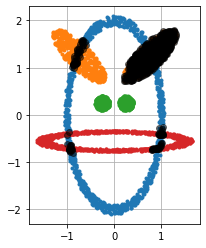

In [8]:
#visualizar erros
plt.plot(X2[0,y2==0],X2[1,y2==0],'.')
plt.plot(X2[0,y2==1],X2[1,y2==1],'.')
plt.plot(X2[0,y2==2],X2[1,y2==2],'.')
plt.plot(X2[0,y2==3],X2[1,y2==3],'.')
plt.plot(X2[0,y2!=y2e],X2[1,y2!=y2e],'ok',alpha=0.5) #erros
plt.axis('scaled')
plt.grid()
plt.show()


Matriz de Confusão
 [[784  50   0  66]
 [459 400  41   0]
 [  0   0 900   0]
 [ 23   0   0 877]]
Número total de erros: 639


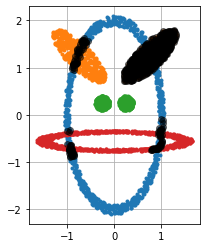

In [9]:
#k_neighbors = 5
knn=KNeighborsClassifier(n_neighbors=5).fit(X1.T,y1) #treinar com dados de treino

y2e=knn.predict(X2.T) #usar classificador para calcular os erros nos dados de teste

#matriz de confusao
print("Matriz de Confusão\n", MC(y2, y2e))

#numero total de erros
print("Número total de erros:", np.sum(y2!=y2e))

#visualizar erros
plt.plot(X2[0,y2==0],X2[1,y2==0],'.')
plt.plot(X2[0,y2==1],X2[1,y2==1],'.')
plt.plot(X2[0,y2==2],X2[1,y2==2],'.')
plt.plot(X2[0,y2==3],X2[1,y2==3],'.')
plt.plot(X2[0,y2!=y2e],X2[1,y2!=y2e],'ok',alpha=0.5) #erros
plt.axis('scaled')
plt.grid()
plt.show()

# Pergunta 3 - Matrizes de distância:
## Considere os dados "digits" do sklearn ()
## 1. Ordene os dados por classe, calcule e visualize a matriz de distâncias para o conjunto de dados, usando a distância euclideana
## 2. Repita a alínea anterior para a distância de cosseno

In [10]:
import sklearn.datasets as dt
D=dt.load_digits()
X=D.data
y=D.target

Classes:  [0 1 2 3 4 5 6 7 8 9]


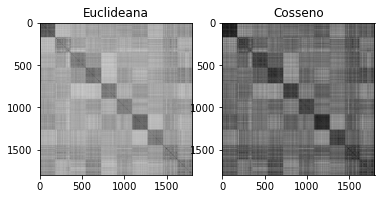

In [11]:
#ordenar dados
X = X[np.argsort(y),:]
y = y[np.argsort(y)]

plt.plot(y)

print("Classes: ", np.unique(y))

import scipy.spatial.distance as spd

#distancia euclideana
D=spd.squareform(spd.pdist(X,'euclidean')) 
plt.subplot(121)
plt.imshow(D,cmap='gray')
plt.title('Euclideana')

#distancia de cosseno
D=spd.squareform(spd.pdist(X,'cosine'))
plt.subplot(122)
plt.imshow(D,cmap='gray')
plt.title('Cosseno')

plt.show()